In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random
from copy import deepcopy

In [2]:
noise_scale = 100
number_of_samples = 50 
x = 25 *(np.random.rand(number_of_samples,1)-0.8)
y = 5*x + 20*x**2+1*x**3+noise_scale*np.random.randn(number_of_samples,1)

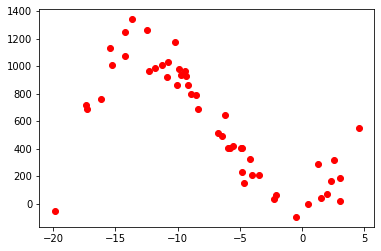

In [3]:
plt.plot(x,y,'ro')
plt.show()

In [4]:
x = np.array(x).flatten().tolist()
y = np.array(y).flatten().tolist()

## 1. Apply a Polynomial to Dataset

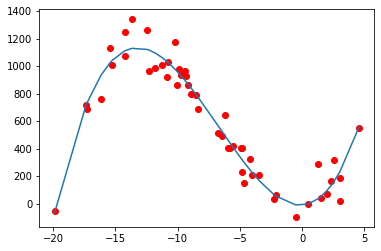

In [5]:
coeff = np.polyfit(x,y,3) 
poly = np.poly1d(coeff)

plt.plot(x,y, 'ro')
sortMe = np.sort(x) 

plt.plot(sortMe, poly(sortMe)) 
plt.show()

In [6]:
coeff

array([ 1.03232393, 20.77120693,  7.71462381, -9.3338979 ])

--- 

## 2. Genetic Algorithm

1. Formula is y = ax<sup>3</sup> + bx<sup>2</sup> + cx+ d
2. Genes are a, b, c, and d
3. Chromosomes are [a,b,c,d]
4. For one array   
&nbsp;&nbsp;&nbsp; a. for every actual point(x,y)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i. Compute y'=ax<sup>3</sup> + bx<sup>2</sup> + cx+ d    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii. Find the sum of (y'-y)<sup>2</sup> over all x values    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; iii. Sum is your measure of "badness" (larger numbers are worse) 

In [7]:
def createPopulation(size):
    '''
    Creates initial population size
    '''
    chromosomes = []
    for i in range(size): 
        chromosomes.append([random.randint(-50,50) for i in range(4)])
    return chromosomes 

In [8]:
def mutate(individual): 
    '''
    Returns 9 new mutated chromosomes from an individual 
    '''
    
    mutations = []
    mutations.append(individual)
    for _ in range(9): 
        new = deepcopy(individual)
        rand_idx = random.randrange(len(new))
        rand_num = new[rand_idx]
        rand_float = random.uniform(0.0,2.0)
        
        new_num = rand_num * rand_float
        new[rand_idx] = new_num
        
        mutations.append(new)
    return mutations

In [9]:
def cost(i, chromosome): 
    '''
    Returns the cost function of a chromosome 
    '''
    return chromosome[0]*(x[i]**3) + chromosome[1]*(x[i]**2) + chromosome[2]*(x[i])+ chromosome[3]


In [10]:
def fitness(chromosome): 
    '''
    Measures a individual/chromosomes's fitness 
    '''
    badness = 0 
    for i in range(len(x)): 
        pred = cost(i, chromosome)
        yval = y[i]
        badness += (pred - yval)**2

    return (chromosome, round(badness))

In [11]:
def fitnessPopulation(population): 
    '''
    Returns the overall population's best 10 fittest individuals 
    '''
    bestGenes = []
    for i in range(len(population)): 
        individual = population[i]
        scores = fitness(individual)
        bestGenes.append(scores)
    bestGenes = sorted(bestGenes, key = lambda x: float(x[1]), reverse = False)[:10]
    return bestGenes 

In [20]:
def main(): 
    num_generations = 500
    bestGenes = []
    
    # create the starting population 
    population = createPopulation(100)

    # iterate through 500 generations 
    for i in range(num_generations): 
        print("Generation Number: " + str(i))
        new_population = []
        
        # find the top 10 best genes of the population to reproduce 
        bestGenes = fitnessPopulation(population)

        for k in range(len(bestGenes)): 
            print(bestGenes[k][0])
            # add mutations to the best genes 
            newGenes = mutate(bestGenes[k][0])
            # for each new child, add to new population 
            for j in newGenes: 
                new_population.append(j)
            
        # replace old population with new population 
        population = deepcopy(new_population)
        
        len(population)
    return population 

In [21]:
mostFit = main()

Generation Number: 0
[-3, -46, -21, 28]
[4, 31, 44, -25]
[-4, -19, 43, 35]
[-2, 13, -25, 17]
[-4, -12, 45, 41]
[6, 48, -38, -21]
[-2, 25, 23, -6]
[6, 23, -50, -9]
[7, 40, -10, 16]
[5, 7, 14, 41]
Generation Number: 1
[1.5313591199956935, 23, -50, -9]
[1.6444567529021072, 23, -50, -9]
[-3, -46, -39.58347073719018, 28]
[-3, -46, -28.050233803493445, 28]
[-3, -46, -21, 28]
[-3, -46, -21, 8.908638431340067]
[-3.5655171456283434, -46, -21, 28]
[-3, -54.4089448409911, -21, 28]
[-3, -21.485443071158283, -21, 28]
[-3, -19.930227967824024, -21, 28]
Generation Number: 2
[1.5313591199956935, 23.652444127107678, -50, -9]
[1.5313591199956935, 23.15189489117915, -50, -9]
[1.5313591199956935, 23, -62.05097513941834, -9]
[1.5313591199956935, 23, -50, -17.986753689925294]
[1.5313591199956935, 23, -50, -9]
[1.5313591199956935, 23, -68.0743557885056, -9]
[1.5313591199956935, 23, -42.75276673102708, -9]
[1.6444567529021072, 23, -90.41894799611363, -9]
[1.180217014008705, 23, -50, -9]
[1.6444567529021072, 2

Generation Number: 77
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.4174256601974385e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.844173774248797e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -5.088215670866753e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.1361861940388097e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.236785810573735e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.0277004146469554e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.282139471468837e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.0757831022638277e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.3379716485734323e-05, -3.800922672730626]
Generation Number: 78
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224

[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.1793804888686397e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.639105217255116e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.367773557054625e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.0571456777657412e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.7150518718670836e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.257957231093823e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.0059165702895744e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.9043351194862752e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -6.905535152809764e-06, -3.800922672730626]
Generation Number: 121
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.4343811483695

[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.562058066591917e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.203928701369878e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.5620583554702484e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.2165736341799784e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.246156950460572e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.7771449294531286e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.6070701441411116e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.5086136196675304e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.4738165158906478e-05, -3.800922672730626]
Generation Number: 155
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369

Generation Number: 200
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.8765973965236926e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.1325228676554366e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -8.090227817492243e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.946560259506621e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -6.699293829464154e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.04754512949579e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -6.902592759276654e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -8.766563609000565e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.4698114445631163e-06, -3.800922672730626]
Generation Number: 201
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.98195453182248

Generation Number: 242
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -5.8447426817183825e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -7.779160101805255e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -4.251767666406759e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.0660337617364348e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -6.769346656673484e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.224486562679124e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.955416660764202e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -4.07521295539129e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.3462807998510124e-05, -3.800922672730626]
Generation Number: 243
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.98195453182248

[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.8546761277150058e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.3405122571074905e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.7775345510655797e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.1154567032728985e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.4811678432988662e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -6.34259495349167e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -9.009276732040193e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -9.641596250733762e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -6.497558688139425e-06, -3.800922672730626]
Generation Number: 282
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.43438114836959

[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.425004608764612e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.922706485829665e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.30309832467553e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.9634545869118684e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -5.030064201869678e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.294663664212697e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -7.826555429530995e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -2.5731616519325488e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.2760148870192931e-06, -3.800922672730626]
Generation Number: 323
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592,

[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -8.794414888785175e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.1410525490335647e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.5771386442674358e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.2037484128148603e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -3.177384655980993e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -8.896041181958088e-06, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -9.11114296930803e-07, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -4.827853255859641e-07, -3.800922672730626]
[0.9819545318224818, 19.434381148369592, -1.8054155581469964e-06, -3.800922672730626]
Generation Number: 363
[0.9819545318224818, 19.434381148369592, -1.851742477566049e-05, -3.800922672730626]
[0.9819545318224818, 19.434381148369592

[0.9819545318224818, 19.43888245445268, -6.509888209853936e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -0.00010750053896091158, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -0.00010756340538628963, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -5.0186626582481955e-05, -4.300187508268699]
Generation Number: 395
[0.9819545318224818, 19.43888245445268, -3.511227646112341e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -6.961497830381909e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -4.514062457513521e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -2.2067870856579094e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -1.529224670918974e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -7.426885300156308e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -3.809588465012965e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -5.459137

[0.9819545318224818, 19.43888245445268, -3.511227646112341e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -6.224857983385116e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -4.1619958262216474e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -4.642642647364217e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -4.912347256960193e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -4.2605560773090984e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -3.587844328595438e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -6.386300525059901e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -2.8489212742058928e-06, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -6.771206980768012e-05, -4.300187508268699]
Generation Number: 431
[0.9819545318224818, 19.43888245445268, -3.511227646112341e-05, -4.300187508268699]
[0.9819545318224818, 19.43888245445268, -5.0642181

[0.9821989711157235, 19.43888245445268, -9.49158358865614e-05, -4.117309379377879]
Generation Number: 469
[0.9821989711157235, 19.43888245445268, -5.6167348909749914e-05, -3.8966215560808317]
[0.9821989711157235, 19.43888245445268, -2.5478426440663783e-05, -3.8966215560808317]
[0.9821989711157235, 19.43888245445268, -4.709318684501131e-05, -3.8966215560808317]
[0.9821989711157235, 19.43888245445268, -3.151583104459746e-05, -3.8966215560808317]
[0.9821989711157235, 19.43888245445268, -4.6709414704112355e-05, -3.8966215560808317]
[0.9821989711157235, 19.43888245445268, -2.56821560846129e-05, -3.8966215560808317]
[0.9821989711157235, 19.43888245445268, -4.003560462905464e-05, -3.8966215560808317]
[0.9821989711157235, 19.43888245445268, -3.828233053644667e-05, -3.8966215560808317]
[0.9821989711157235, 19.43888245445268, -2.4947550742679218e-05, -3.8966215560808317]
[0.9821989711157235, 19.43888245445268, -1.666579077082429e-05, -3.8966215560808317]
Generation Number: 470
[0.982198971115723

In [14]:
new_coeff = fitnessPopulation(mostFit)[0][0]

In [15]:
new_coeff

[0.9308890267639042,
 18.60620995050466,
 1.829192909543363e-12,
 -1.419639682054509e-11]

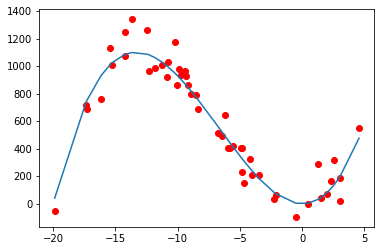

In [16]:
poly = np.poly1d(new_coeff)
plt.plot(x,y, 'ro')
newSorted = np.sort(x) 

plt.plot(newSorted, poly(newSorted)) 
plt.show()

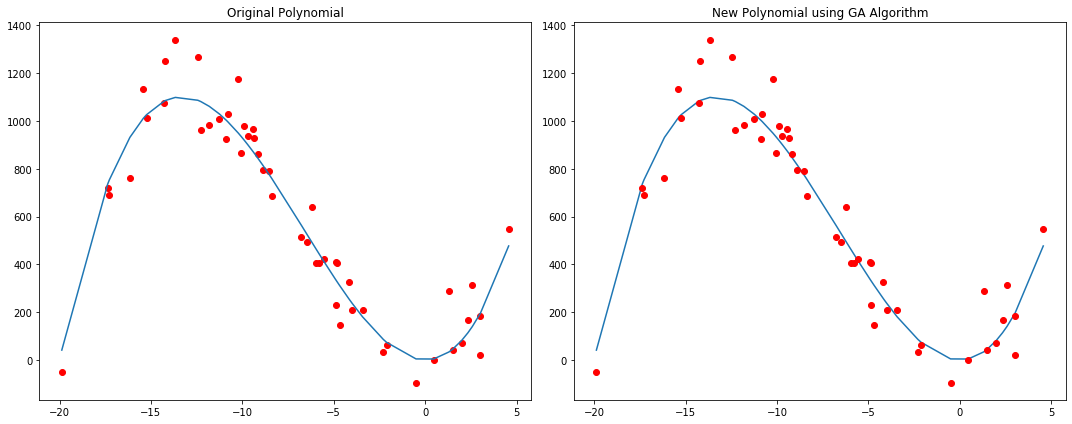

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(x,y, 'ro')
axes[0].plot(sortMe, poly(sortMe))
axes[0].set_title("Original Polynomial")

axes[1].plot(newSorted, poly(newSorted))
axes[1].plot(x,y, 'ro')
axes[1].set_title("New Polynomial using GA Algorithm")

fig.tight_layout()